# Hypothesis 1: We expect that there will be more 311 cases during the middle of the week.

by Paul Pineda


In [1]:
#dependencies
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import requests
from census import Census
from us import states
from pprint import pprint
import datetime
import gmaps
import scipy.stats as stats
from scipy.stats import linregress
from numpy.random import rand
import matplotlib.cm as cm


In [2]:
final_df = pd.read_csv('final_df corrected.csv')
final_df

,Unnamed: 0,CaseID,Opened,Category,Request Type,Neighborhood,Latitude,Longitude,Source,Media URL,Opened Date,Opened Year,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,0,10395976,01/23/2019 01:34:53 PM,Sign Repair,Sign - Missing,Mission,37.764091,-122.413002,Web,NaN,01/23/2019,2019,94110,73737.0,36.6,109747.0,59660.0,7321.0,9.928530
1,1,11886797,01/01/2020 09:06:00 PM,General Request - PUBLIC WORKS,request_for_service,Mission,37.764840,-122.415038,Web,NaN,01/01/2020,2020,94110,73737.0,36.6,109747.0,59660.0,7321.0,9.928530
2,2,11089240,07/05/2019 03:12:37 PM,Graffiti,Graffiti on Building_other,Mission,37.755848,-122.414551,Integrated Agency,NaN,07/05/2019,2019,94110,73737.0,36.6,109747.0,59660.0,7321.0,9.928530
3,3,11239390,08/07/2019 01:25:51 PM,Graffiti,Graffiti on Building_other,Mission,37.755703,-122.416397,Integrated Agency,NaN,08/07/2019,2019,94110,73737.0,36.6,109747.0,59660.0,7321.0,9.928530
4,4,11886078,01/01/2020 03:27:00 PM,Street and Sidewalk Cleaning,General Cleaning,Mission,37.769532,-122.415847,Mobile/Open311,http://mobile311.sfgov.org/reports/11886078/ph...,01/01/2020,2020,94110,73737.0,36.6,109747.0,59660.0,7321.0,9.928530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1873838,1873838,11445821,09/21/2019 08:53:04 AM,Encampments,Encampment Reports,Presidio National Park,37.806462,-122.450988,Mobile/Open311,http://mobile311.sfgov.org/reports/11445821/ph...,09/21/2019,2019,94129,4019.0,29.4,190167.0,81974.0,122.0,3.035581
1873839,1873839,11451330,09/22/2019 06:16:00 PM,Street Defects,Pavement_Defect,Presidio National Park,37.804123,-122.472125,Mobile/Open311,NaN,09/22/2019,2019,94129,4019.0,29.4,190167.0,81974.0,122.0,3.035581
1873840,1873840,11416625,09/14/2019 05:20:44 PM,Parking Enforcement,Blocking_Bicycle_Lane,Presidio National Park,37.801830,-122.456973,Mobile/Open311,http://mobile311.sfgov.org/reports/11416625/ph...,09/14/2019,2019,94129,4019.0,29.4,190167.0,81974.0,122.0,3.035581
1873841,1873841,11444928,09/20/2019 07:55:37 PM,Noise Report,Noise Issue,Presidio National Park,37.808779,-122.471963,Mobile/Open311,NaN,09/20/2019,2019,94129,4019.0,29.4,190167.0,81974.0,122.0,3.035581


### Converted "Opened" date column to display "Day of week" and stored data to new Column

In [3]:
opened_date = '01/11/2017'
date_of_week = datetime.datetime.strptime(opened_date,'%m/%d/%Y' ).strftime("%A");
date_of_week


def convert_to_day_of_week(str_date):
    return datetime.datetime.strptime(str_date,'%m/%d/%Y' ).strftime("%A");

In [4]:
final_df["Day of the Week"] = final_df["Opened Date"].apply(convert_to_day_of_week)
final_df

final_df.to_csv('Final DataFrame.csv')

## 311 case count per Day of Week

In [5]:
day_week = final_df["Day of the Week"].value_counts()
day_week

day_week_df = pd.DataFrame(day_week)
# day_week_df

In [27]:
observed = pd.Series([302602, 301241, 293854, 285868, 268014, 214967, 207297], index=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# Create a data frame
testing_df = pd.DataFrame([observed]).T

# Add a column whose default values are the expected values
testing_df[1] = 267691.86

# Rename the columns
testing_df.columns = ["observed", "expected"]

# View the data frame
testing_df

,observed,expected
Monday,302602,267691.86
Tuesday,301241,267691.86
Wednesday,293854,267691.86
Thursday,285868,267691.86
Friday,268014,267691.86
Saturday,214967,267691.86
Sunday,207297,267691.86


In [28]:
dow = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_count = testing_df["observed"]
day_count
x_axis = np.arange(len(dow))

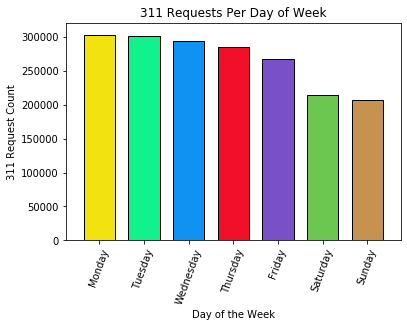

In [29]:
plt.bar(dow, day_count, color=(('#F2E30F', '#0FF28C', '#0F93F2', '#F20F29', '#7950C7', '#6BC750', '#C79150')), 
                                align="center", width = 0.7, edgecolor = 'black', linewidth = 1)
tick_locations = [value for value in dow]
plt.xticks(tick_locations, dow, rotation=70)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(day_count)+18000)
plt.title("311 Requests Per Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("311 Request Count")
plt.show()

## Statistics - Information

In [30]:
critical_value = stats.chi2.ppf(q = 0.95, df = 6)
critical_value

12.591587243743977

In [31]:
stats.chisquare(testing_df['observed'], testing_df['expected'])

Power_divergenceResult(statistic=36559.37111743779, pvalue=0.0)

In [32]:
mean = np.mean(day_week_df)
mean

Day of the Week    267691.857143
dtype: float64

In [33]:
mean = np.mean(day_week)
mean

267691.85714285716

In [34]:
median = np.median(day_week)
median

285868.0

In [35]:
mode = stats.mode(day_week_df)
mode

ModeResult(mode=array([[207297]]), count=array([[1]]))

## Type of Sources used to make 311 Calls

In [36]:
source_counts = final_df['Source'].value_counts()
source_counts

Mobile/Open311       1034430
Phone                 549058
Web                   229337
Integrated Agency      51156
Twitter                 9363
Other Department         491
Email                      8
Name: Source, dtype: int64

In [37]:
Other = final_df.loc[(final_df["Source"] == "Email") | (final_df["Source"] == "Integrated Agency") | (final_df["Source"] == "Other Department")]
other_source_num = len(Other["Source"])
other_source_num 

51655

In [38]:
Mobile_App = final_df.loc[final_df["Source"] == "Mobile/Open311"]
mobile_num = len(Mobile_App["Source"])
mobile_num

1034430

In [39]:
Phone = final_df.loc[final_df["Source"] == "Phone"]
phone_num = len(Phone["Source"])
phone_num

549058

In [40]:
Web = final_df.loc[final_df["Source"] == "Web"]
web_num = len(Web["Source"])
web_num

229337

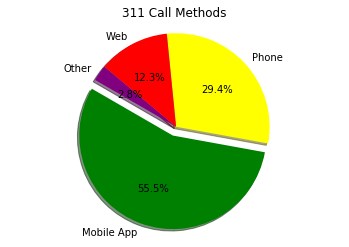

In [41]:
Method = ["Other", "Mobile App", "Phone", "Web"]
count_method = [other_source_num, mobile_num, phone_num, web_num]
colors = ["purple","green","yellow","red","blue"]
explode = (0,0.1,0,0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(count_method, explode=explode, labels=Method, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, pctdistance=0.6)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("311 Call Methods")

# Save an image of our chart and print the final product to the screen
plt.savefig("311 Call Methods.png")
plt.show()

## Number of request by Categories

In [42]:
category = final_df.groupby('Category')['CaseID'].count().sort_values().tail(5)
category_df = pd.DataFrame(category)
category_df

,CaseID
Category,
Abandoned Vehicle,95957
Parking Enforcement,139749
Encampments,199987
Graffiti,214926
Street and Sidewalk Cleaning,732131


In [43]:
cat_c = ['Abandoned Vehicle','Parking Enforcement', 'Encampments', 
                  'Graffiti', 'Street/Sidewalk Cleaning']
cat_c
cat_count = category_df['CaseID']
cat_count
x_axis = np.arange(len(cat_c))

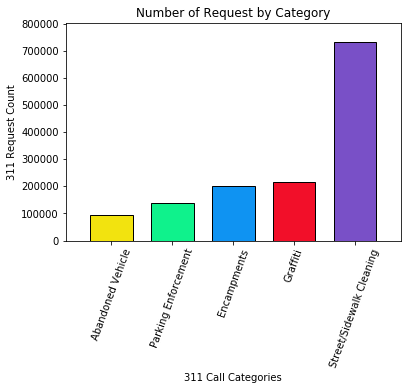

In [44]:
plt.bar(cat_c, cat_count, color=(('#F2E30F', '#0FF28C', '#0F93F2', '#F20F29', '#7950C7')), 
                                align="center", width = 0.7, edgecolor = 'black', linewidth = 1)
tick_locations = [value for value in cat_c]
plt.xticks(tick_locations, cat_c, rotation=70)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(day_count)+500000)
plt.title("Number of Request by Category")
plt.xlabel("311 Call Categories")
plt.ylabel("311 Request Count")
plt.show()

## Number of Request by Sub-cat

In [45]:
service = final_df.groupby('Request Type')['CaseID'].count().sort_values().tail(5)
service_df = pd.DataFrame(service)
service_df


,CaseID
Request Type,
request_for_service,73264
Human or Animal Waste,90076
Encampment Reports,189174
General Cleaning,227946
Bulky Items,300248


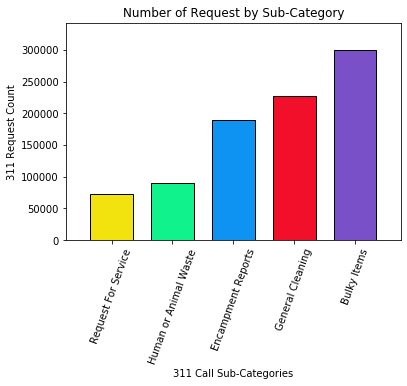

In [46]:
scat_c = ['Request For Service','Human or Animal Waste', 'Encampment Reports', 
                  'General Cleaning', 'Bulky Items']
scat_c
scat_count = service_df['CaseID']
scat_count
x_axis = np.arange(len(scat_c))

plt.bar(scat_c, scat_count, color=(('#F2E30F', '#0FF28C', '#0F93F2', '#F20F29', '#7950C7')), 
                                align="center", width = 0.7, edgecolor = 'black', linewidth = 1)
tick_locations = [value for value in scat_c]
plt.xticks(tick_locations, scat_c, rotation=70)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(day_count)+40000)
plt.title("Number of Request by Sub-Category")
plt.xlabel("311 Call Sub-Categories")
plt.ylabel("311 Request Count")
plt.show()